In [144]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [145]:
# cat part

In [146]:
# pre-process data

In [147]:
path='/Users/xiaoshuaiheng/Desktop/EE 551 Python/final project/cat'
trainFiles = os.listdir(path)
numFiles = len(trainFiles)
image_size=(50,50)
cat_set=[]
for i in range(numFiles-1):
    image = cv.imread(path+'/'+str(i)+'.jpg',cv.IMREAD_GRAYSCALE)
    image = cv.resize(image,image_size) # resize all images as uniform pixel
    image = image.reshape(image.size)  # reshape image matrix as 2500*1
    cat_set.append(image)

In [148]:
cat_set=np.array(cat_set)     # convert image_set type to array
print(cat_set.shape)
cat_set=np.transpose(cat_set)   # get the transpose image_Set matrix
print(cat_set.shape)

(50, 2500)
(2500, 50)


In [149]:
# get the mean face

Text(0.5, 1.0, 'mean cat face')

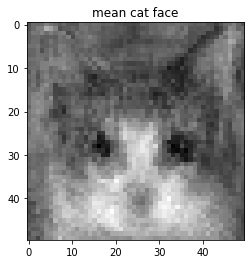

In [150]:
mean_cat = cat_set.mean(axis=1)
mean_cat.shape
plt.imshow(mean_cat.reshape(50,50),cmap='gray')
plt.title('mean cat face')

In [151]:
# using PCA algorithm get the eigenfaces

In [152]:
scatter_matrix=np.zeros(shape=(2500,2500)) # set up an empty scatter_matrix
for i in range(50):
    a=cat_set[:,i].reshape(2500,1)-mean_cat.reshape(2500,1)
    b=a.transpose()
    scatter=a*b
    scatter_matrix+=scatter

In [153]:
(eigenvalues,eigenvectors)=la.eig(scatter_matrix) # eigendecomposition

In [154]:
eigenvalues=eigenvalues.real   # convert complex nums to real nums
print(eigenvalues)
eigenvectors=eigenvectors.real
print(eigenvectors)

[ 1.15694143e+08  7.57828387e+07  3.88803378e+07 ... -1.30229520e-12
 -1.30229520e-12 -2.17339666e-11]
[[ 0.04019428 -0.00796898  0.01868556 ...  0.0048468   0.0048468
  -0.00181273]
 [ 0.0379048  -0.00873341  0.01737816 ...  0.00023081  0.00023081
  -0.00062048]
 [ 0.04025592 -0.00884969  0.01784118 ... -0.00076511 -0.00076511
   0.00015262]
 ...
 [ 0.00266401 -0.00775287  0.03830061 ...  0.00024987  0.00024987
  -0.00786179]
 [ 0.00485449 -0.00731148  0.03471125 ...  0.03955391  0.03955391
  -0.05962925]
 [ 0.00745458 -0.00996759  0.03146117 ...  0.03887626  0.03887626
  -0.01885738]]


In [155]:
eigen_cat=eigenvectors[:,0:5] # take first top 5 images as our eigenfaces and train set
eigen_cat.shape

(2500, 5)

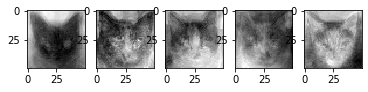

In [156]:
for i in range(1,5):
    plt.subplot(1,5,i)
    plt.imshow(eigen_cat[:,i-1].reshape(50,50),cmap='gray')
    #plt.title(str(i))
plt.subplot(1,5,5)
plt.imshow(eigen_cat[:,4].reshape(50,50),cmap='gray')
#plt.title('20')

In [157]:
#Dog part

In [158]:
path='/Users/xiaoshuaiheng/Desktop/EE 551 Python/final project/dog'
trainFiles = os.listdir(path)
numFiles = len(trainFiles)
image_size=(50,50)
dog_set=[]
for i in range(numFiles-1):
    image = cv.imread(path+'/'+str(i)+'.jpg',IMREAD_GRAYSCALE)
    image = cv.resize(image,image_size) # resize all images as uniform pixel
    image = image.reshape(image.size)  # reshape image matrix as 2500*1
    dog_set.append(image)

In [159]:
dog_set=np.array(dog_set)     # convert image_set type to array
print(dog_set.shape)
dog_set=np.transpose(dog_set)   # get the transpose image_Set matrix
print(dog_set.shape)

(50, 2500)
(2500, 50)


Text(0.5, 1.0, 'mean dog face')

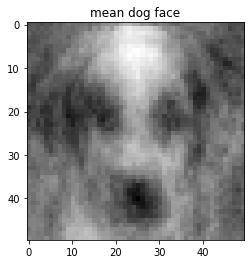

In [160]:
mean_dog = dog_set.mean(axis=1)
mean_dog.shape
plt.imshow(mean_dog.reshape(50,50),cmap='gray')
plt.title('mean dog face')

In [161]:
scatter_matrix=np.zeros(shape=(2500,2500)) # set up an empty scatter_matrix
for i in range(50):
    a=dog_set[:,i].reshape(2500,1)-mean_dog.reshape(2500,1)
    b=a.transpose()
    scatter=a*b
    scatter_matrix+=scatter
(eigenvalues,eigenvectors)=la.eig(scatter_matrix)
eigenvalues=eigenvalues.real   
print(eigenvalues)
eigenvectors=eigenvectors.real
print(eigenvectors)
eigen_dog=eigenvectors[:,0:5]

[ 1.23174073e+08  6.93904379e+07  2.84066654e+07 ... -2.40572178e-11
  8.19672880e-12 -7.86711260e-12]
[[ 0.0081418  -0.03170055  0.02128747 ... -0.00076396 -0.00198426
   0.00386961]
 [ 0.0080169  -0.03190764  0.02330805 ...  0.00025385  0.0001614
   0.00030215]
 [ 0.00659387 -0.02933896  0.02257307 ... -0.0001157   0.00032325
  -0.00016559]
 ...
 [-0.00365179 -0.03269874 -0.03731321 ... -0.03560489 -0.01308003
  -0.0413615 ]
 [ 0.00025433 -0.03483837 -0.03688277 ...  0.0230084   0.03736794
   0.00269665]
 [-0.00179743 -0.03636634 -0.03662927 ...  0.00283504  0.02945205
  -0.01034488]]


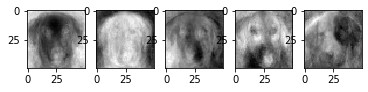

In [162]:
for i in range(1,5):
    plt.subplot(1,5,i)
    plt.imshow(eigen_dog[:,i-1].reshape(50,50),cmap='gray')
    #plt.title(str(i))
plt.subplot(1,5,5)
plt.imshow(eigen_dog[:,4].reshape(50,50),cmap='gray')
#plt.title('20')

In [163]:
### KNN algorithm

In [164]:
k=3

In [165]:
def k_nearestNeighbor(k,test,eigen_cat,eigen_dog):
    length_cat,width_cat=eigen_cat.shape  # calculate distance between test and eigen_cat
    result_cat=[]
    for i in range(width_cat):
        sum_cat=sum((eigen_cat[:,i]-test)**2)
        dis_cat=np.sqrt(sum_cat)
        result_cat.append(dis_cat)
    length_dog,width_dog=eigen_dog.shape # calculate distance between test and eigen_dog
    result_dog=[]
    for j in range(width_dog):
        sum_dog=sum((eigen_dog[:,j]-test)**2)
        dis_dog=np.sqrt(sum_dog)
        result_dog.append(dis_dog)
    result_cat.sort()
    result_dog.sort()
    dic={}
    for ii in range(k):
        dic[result_cat[ii]]='cat'
        dic[result_dog[ii]]='dog'
    for jj in range(k):
        del dic[max(dic.keys())]
    return dic
        

In [166]:
# test

In [167]:
path='/Users/xiaoshuaiheng/Desktop/EE 551 Python/final project/test_cat'
trainFiles = os.listdir(path)
numFiles = len(trainFiles)
image_size=(50,50)
for i in range(numFiles-1):
    image = cv.imread(path+'/'+str(i)+'.jpg',cv.IMREAD_GRAYSCALE)
    image = cv.resize(image,image_size) 
    image = image.reshape(image.size)
    #image = image-mean_cat
    image = image/np.std(image,ddof=1)
    print(k_nearestNeighbor(3,image,eigen_cat,eigen_dog))

{141.55406013715358: 'cat', 141.9460840808052: 'cat', 142.02482542787305: 'cat'}
{118.8011359907203: 'cat', 119.254013892226: 'cat', 119.27990986784336: 'cat'}
{82.16771523349297: 'cat', 82.54757653371979: 'dog', 82.33393187490883: 'cat'}
{93.3602768891786: 'cat', 93.75414032871802: 'dog', 93.41486280015005: 'cat'}
{103.78620978011774: 'cat', 104.12509771334439: 'dog', 103.97947381943278: 'cat'}
{124.46652002323823: 'cat', 124.81573603821039: 'cat', 124.84476051000506: 'cat'}
{110.18445278596475: 'cat', 110.19057771375033: 'cat', 110.19111460955344: 'cat'}
{109.64441665588139: 'cat', 110.04141148326566: 'dog', 109.9533465817786: 'cat'}
{183.66220219433325: 'cat', 183.87666477133578: 'dog', 183.85660914396152: 'cat'}
{182.11994975713125: 'cat', 182.4344147813319: 'dog', 182.3077815394615: 'cat'}


In [168]:
path='/Users/xiaoshuaiheng/Desktop/EE 551 Python/final project/test_dog'
trainFiles = os.listdir(path)
numFiles = len(trainFiles)
image_size=(50,50)
for i in range(numFiles-1):
    image = cv.imread(path+'/'+str(i)+'.jpg',cv.IMREAD_GRAYSCALE)
    image = cv.resize(image,image_size) 
    image = image.reshape(image.size)
    #image = image-mean_dog
    image = image/np.std(image,ddof=1)
    print(k_nearestNeighbor(3,image,eigen_cat,eigen_dog))

{124.02775965373459: 'cat', 124.16580953522205: 'dog', 124.21641685855643: 'cat'}
{113.78734460228323: 'cat', 114.02552060206128: 'cat', 114.02918077827113: 'cat'}
{97.86986411030796: 'cat', 98.02630341692452: 'cat', 98.16069626269928: 'cat'}
{125.99752798662203: 'cat', 126.2255554646807: 'cat', 126.39983807633254: 'cat'}
{153.0387018680535: 'cat', 153.08811469572163: 'dog', 153.11182198012426: 'cat'}
{120.68916170388007: 'cat', 121.02975652636577: 'dog', 120.9965464934432: 'cat'}
{115.56404245784434: 'cat', 115.79425350259537: 'dog', 115.80795750882629: 'cat'}
{123.82996995217232: 'cat', 124.1098650281999: 'cat', 124.11594992045663: 'cat'}
{165.15236421325466: 'cat', 165.3233051122957: 'dog', 165.16016447805524: 'cat'}
{137.75208411876835: 'cat', 138.06096250684817: 'dog', 137.9746648938852: 'cat'}


In [82]:
# SVM

In [90]:
# pre-process
eigen_dog=eigen_dog.transpose()
eigen_cat=eigen_cat.transpose()
train=np.vstack((eigen_cat,eigen_dog))

In [103]:
train

array([[ 0.04019428,  0.0379048 ,  0.04025592, ...,  0.00266401,
         0.00485449,  0.00745458],
       [-0.00796898, -0.00873341, -0.00884969, ..., -0.00775287,
        -0.00731148, -0.00996759],
       [ 0.01868556,  0.01737816,  0.01784118, ...,  0.03830061,
         0.03471125,  0.03146117],
       ...,
       [ 0.02128747,  0.02330805,  0.02257307, ..., -0.03731321,
        -0.03688277, -0.03662927],
       [ 0.01967678,  0.01725989,  0.0229938 , ..., -0.01819133,
        -0.00961953,  0.00062779],
       [ 0.00700653,  0.00742868,  0.0059267 , ..., -0.01031777,
        -0.00815541, -0.00841316]])

In [118]:
response1=np.ones((5,1))
response2=np.zeros((5,1))
response=np.vstack((response1,response2))
response

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [119]:
from sklearn import svm

In [120]:
clf = svm.SVC(kernel='poly')

In [124]:
clf.fit(train,np.ravel(response,order='C'))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# test

In [180]:
path='/Users/xiaoshuaiheng/Desktop/EE 551 Python/final project/test_cat'
trainFiles = os.listdir(path)
numFiles = len(trainFiles)
image_size=(50,50)
sum_=0
for i in range(numFiles-1):
    image = cv.imread(path+'/'+str(i)+'.jpg',cv.IMREAD_GRAYSCALE)
    image = cv.resize(image,image_size) 
    image = image.reshape(image.size)
    image = image-mean_cat
    image = image/np.std(image,ddof=1)
    image = image.reshape((1,-1))
    sum_+=clf.predict(image)
    if clf.predict(image)[0]==0:
        print('Wrong, this is dog')
    else:
        print('Correct, this is cat')
    accuracy=sum_[0]/(numFiles-1)
print('\naccuracy is %.1f' %(accuracy))

Correct, this is cat
Correct, this is cat
Correct, this is cat
Correct, this is cat
Wrong, this is dog
Wrong, this is dog
Correct, this is cat
Correct, this is cat
Wrong, this is dog
Correct, this is cat

accuracy is 0.7


In [179]:
path='/Users/xiaoshuaiheng/Desktop/EE 551 Python/final project/test_dog'
trainFiles = os.listdir(path)
numFiles = len(trainFiles)
image_size=(50,50)
sum_=0
for i in range(numFiles-1):
    image = cv.imread(path+'/'+str(i)+'.jpg',cv.IMREAD_GRAYSCALE)
    image = cv.resize(image,image_size) 
    image = image.reshape(image.size)
    image = image-mean_dog
    image = image/np.std(image,ddof=1)
    image = image.reshape((1,-1))
    sum_+=clf.predict(image)
    if clf.predict(image)[0]==0:
        print('Correct, this is dog')
    else:
        print('Wrong, this is cat')
    accuracy=(numFiles-sum_[0])/(numFiles-1)
print('\naccuracy is %.1f' %(accuracy))

Correct, this is dog
Correct, this is dog
Correct, this is dog
Wrong, this is cat
Wrong, this is cat
Correct, this is dog
Correct, this is dog
Correct, this is dog
Wrong, this is cat
Correct, this is dog

accuracy is 0.8
